In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns

In [47]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [68]:
x = df.drop(columns = ['species'])

In [74]:
inertia = []
k = range(1,11)

for i in k:
    kmeans = KMeans(n_clusters = i,random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

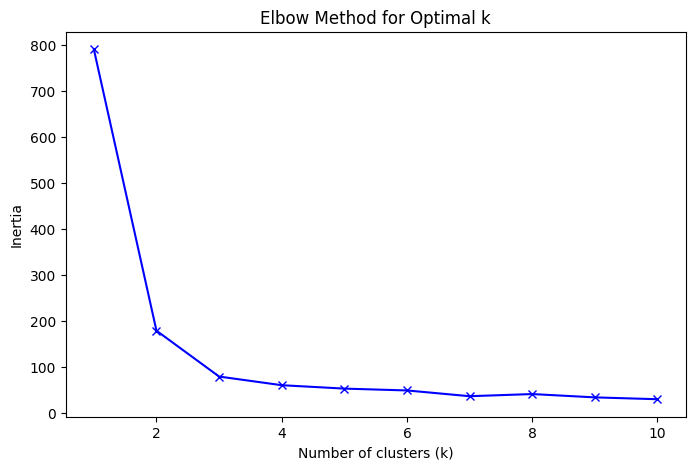

In [75]:
#plot elbow
plt.figure(figsize=(8,5))
plt.plot(k, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [76]:
optimal_k = 3

In [77]:
# fit KMeans with theoptimal
kmeans = KMeans(n_clusters = optimal_k)
kmeans.fit(x)

KMeans(n_clusters=3)

In [78]:
cluster_labels = kmeans.fit_predict(x)

In [79]:
# add clusters labels
df['cluster'] = cluster_labels
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species  cluster
0             5.1          3.5           1.4          0.2     setosa        1
1             4.9          3.0           1.4          0.2     setosa        1
2             4.7          3.2           1.3          0.2     setosa        1
3             4.6          3.1           1.5          0.2     setosa        1
4             5.0          3.6           1.4          0.2     setosa        1
..            ...          ...           ...          ...        ...      ...
145           6.7          3.0           5.2          2.3  virginica        2
146           6.3          2.5           5.0          1.9  virginica        0
147           6.5          3.0           5.2          2.0  virginica        2
148           6.2          3.4           5.4          2.3  virginica        2
149           5.9          3.0           5.1          1.8  virginica        0

[150 rows x 6 columns]


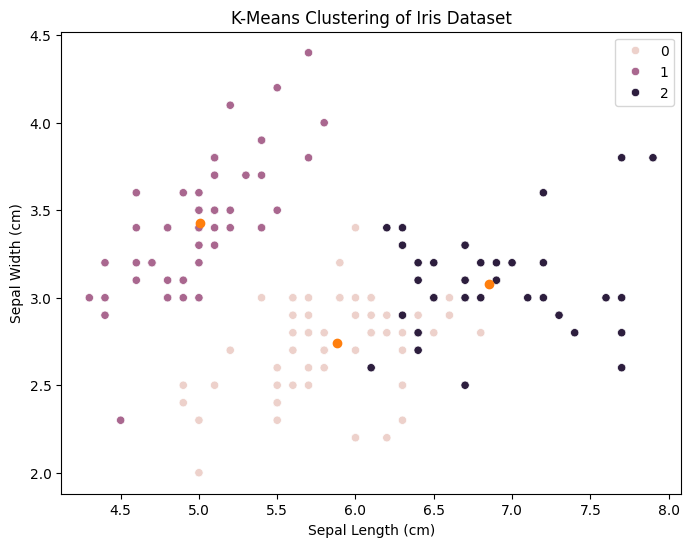

In [80]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x ='sepal_length', y='sepal_width', hue='cluster', data=df)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()